In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.loc[~df['TotalCharges'].str.contains(' ')]
df['TotalCharges'] = df['TotalCharges'].astype(float)

<ipython-input-3-5cbe568a6660>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)


**1. Perform standard data cleansing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there's no missing value on this data

In [ ]:
df.duplicated().sum()

0

there's no duplicated value on this data

**2. Perform standard EDA with rich interpretations**

a. Statistical summary of columns

In [ ]:
cats = [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn'
    ]
nums = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
    ]

In [ ]:
df[nums].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df = df.drop(columns='SeniorCitizen') # in median, 25%, and 75% the value is 0, this column must be dropped

In [ ]:
df[nums].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


1. tenure has roughly symmetrical distribution (median-mean min. comparison 10%)
2. MonthlyCharges roughly symmetrical distribution (mean-mean min. comparison 10%)
3. TotalCharges has skewed distribution (median<mean comparison min. comparison 10%)

In [ ]:
df[cats].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


when the unique value > 15, it must be dropped

In [ ]:
df = df.drop(columns='customerID')

In [ ]:
df[cats].describe() # customerID has dropped because the value > 15 (7032 unique)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
df['gender'].value_counts() # customers with gender Male > Female

Male      3549
Female    3483
Name: gender, dtype: int64

In [ ]:
df['InternetService'].value_counts()
# there's more customers using Fiber optic for InternetService

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
df['Contract'].value_counts()
# customers prefer to pick Month-to-month for Contract

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
df['PaymentMethod'].value_counts()
# customers prefer to pick Electronic check for PaymentMethod

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

b. Univariate analysis

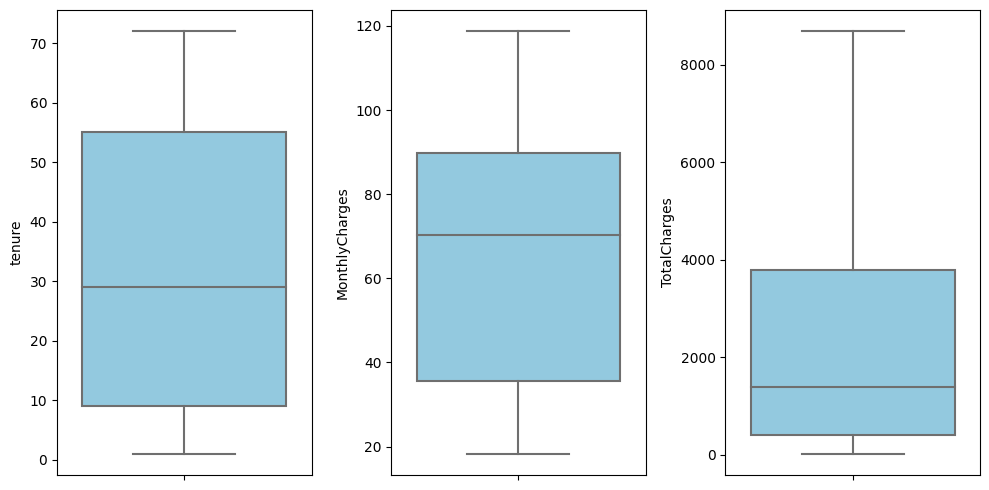

In [ ]:
features = nums
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='skyblue')
  plt.tight_layout()

tenure and MonthlyCharges has symmetrical distribution and TotalCharges has skewed distribution

In [ ]:
outlier = df['tenure'].min()

df[df['tenure'] == outlier]

outlier

1

In [ ]:
outlier = df['MonthlyCharges'].min()

df[df['MonthlyCharges'] == outlier]

outlier

18.25

In [ ]:
outlier = df['TotalCharges'].min()

df[df['TotalCharges'] == outlier]

outlier

18.8

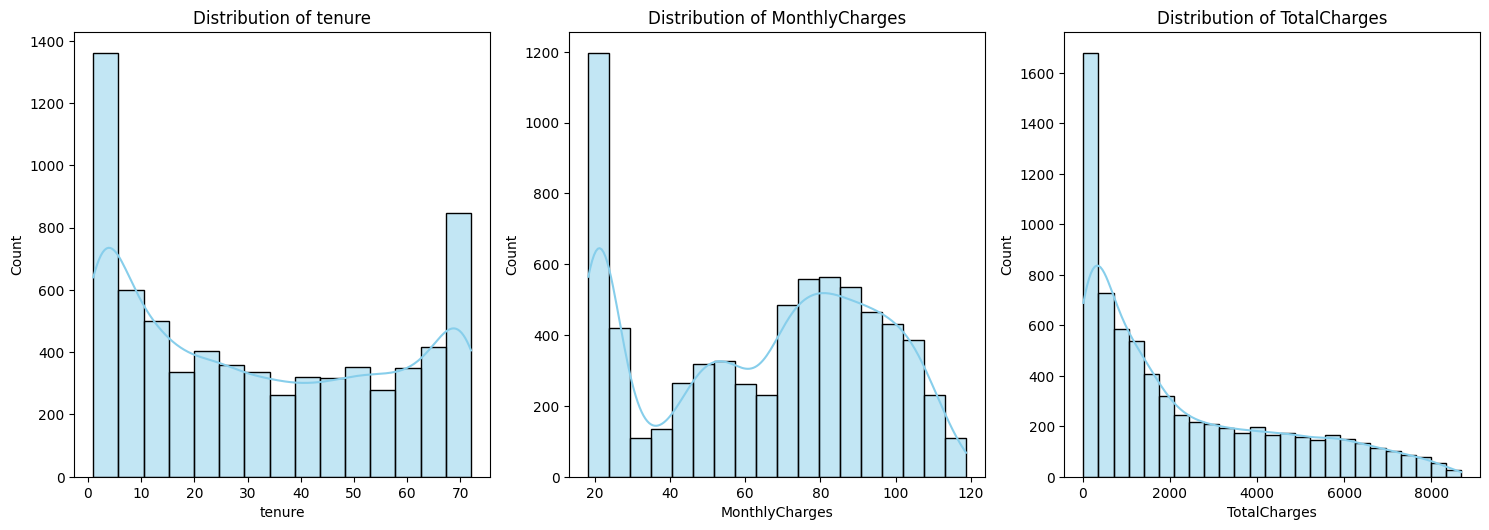

In [ ]:
features = nums
plt.figure(figsize=(15, 5 * (len(features)//3 + 1)))

for i in range(0, len(features)):
    plt.subplot(len(features)//3 + 1, 3, i+1)  # Adjust the number of columns as needed
    sns.histplot(df[features[i]], kde=True, color='skyblue')
    plt.title(f'Distribution of {features[i]}')
    plt.tight_layout()

plt.show()

<Axes: xlabel='gender', ylabel='count'>

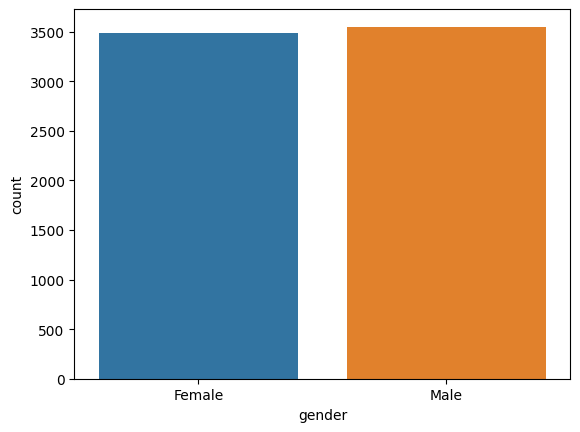

In [ ]:
sns.countplot(data=df, x='gender')

<Axes: xlabel='InternetService', ylabel='count'>

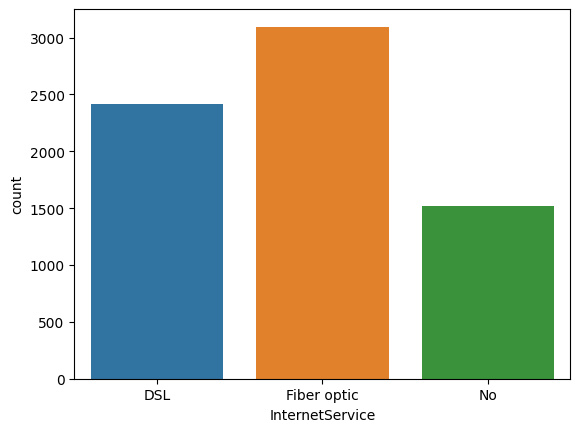

In [ ]:
sns.countplot(data=df, x='InternetService')

<Axes: xlabel='Contract', ylabel='count'>

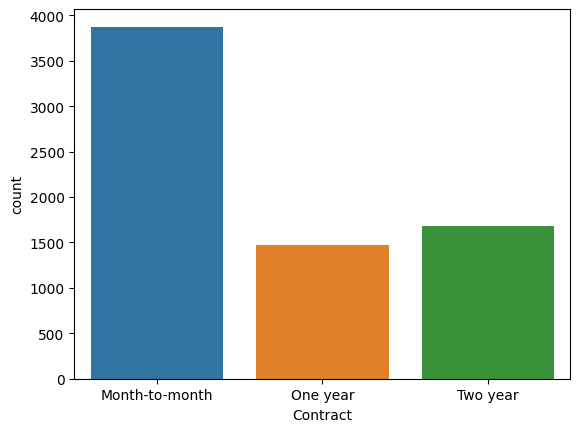

In [ ]:
sns.countplot(data=df, x='Contract')

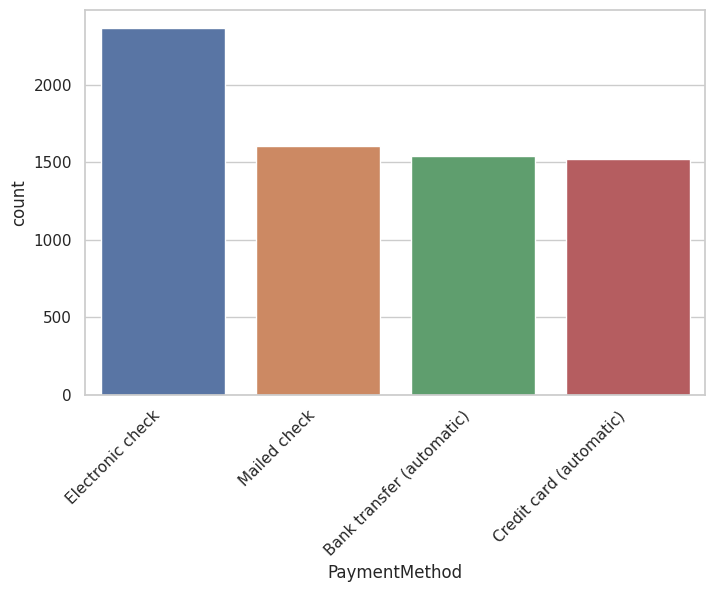

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.countplot(data=df, x='PaymentMethod')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

c. Multivariate analysis

<ipython-input-28-bb320dcac5c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

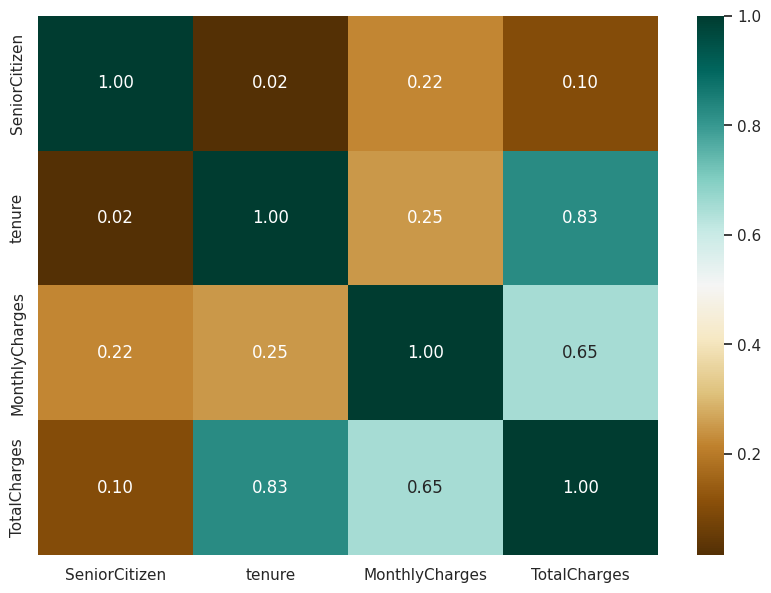

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True,
            fmt='.2f', cmap='BrBG')

Customer with high tenure will have high MonthlyCharges (tenure & MonthlyCharges have 0.25 point)

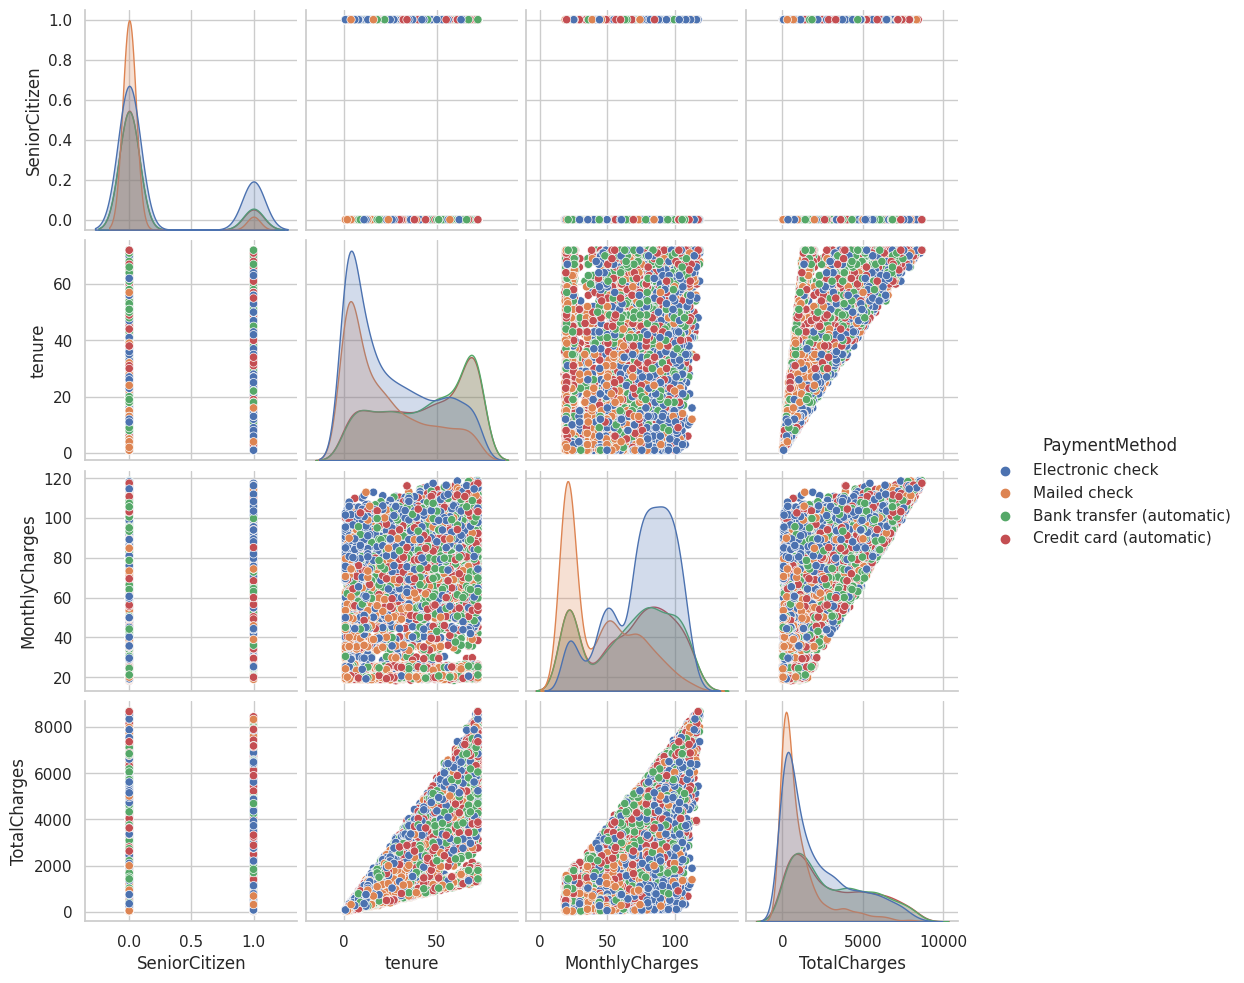

In [ ]:
sns.pairplot(df, hue='PaymentMethod')

Customer with high tenure often used Electronic Check in their PaymentMethod

**3. Perform deep-dive exploration**

a. Ask minimum 2 questions

1. what are the customer gender with most used Fiber optic for their Internet Service?
2. what are customer with the highest MonthlyCharges in TOP 10?

b. At least 1 of them should involve group-by aggregation

In [ ]:
df.groupby(['gender']).agg(
    FiberOptic=('InternetService', lambda x: (x == 'Fiber optic').sum())
).reset_index()

,gender,FiberOptic
0,Female,1553
1,Male,1543


1. the most customers gender used Fiber optic for their Internet Service is Female (1553 customers)

In [ ]:
df_sorted = df.sort_values(by='MonthlyCharges', ascending=False)
top_10_charges = df_sorted.head(10)
top_10_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
2115,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
4804,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
3894,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
5127,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
6118,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
3205,3810-DVDQQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.90,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
4875,2302-ANTDP,Female,1,Yes,No,48,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,117.45,5438.90,Yes


2. this is TOP 10 customer with the highest MonthlyCharges